# Data Analysis and Data Science
## Be curious about the data 

By: NOME
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>


**Student Name**: FABRE Léna

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [10]:
## Define variable with file name
fn = "breast_cancer_metametric.tsv"

In [11]:
## Read ans save data into variable as a dataframe
data = pd.read_csv(fn, sep='\t', header=0)
data

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,7.0,4.036,212.200000,18.0,1.0,60.0
1100,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,15.0,4.050,51.966667,25.0,2.0,60.0
1101,0.0,1.0,1.0,0.0,2.0,2.0,3.0,3.0,8.0,6.060,80.733333,30.0,3.0,60.0
1102,0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,8.0,3.050,87.733333,25.0,2.0,60.0


## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [12]:
print(len(data), "samples a.k.a patients")

print(len(data.columns), "variables")

1104 samples a.k.a patients
14 variables


***
2. How many age groups are considered?

In [13]:
data.loc[:,"AGE_GROUP"].nunique()
print(data.loc[:,"AGE_GROUP"].nunique(),"Age group")

6 Age group


***
3. What is the mean overall survival (in month)?

In [14]:
num = data.loc[:,["OS_MONTHS"]]
print (int(num.mean(axis=0).values[0]),"months")

126 months


***
4. What is the highest mutation count?

In [15]:
num = data.loc[:,["MUTATION_COUNT"]]
print (int(num.max(axis=0).values[0]),"highest mutation count")

46 highest mutation count


***
5. How large is the smallest tumor?

In [16]:
num = data.loc[:,["TUMOR_SIZE"]]
print(int(num.min(axis=0).values[0]), "cm")

1 cm


***
6. What are the grade considered in the dataset?

In [17]:
print("Grades:",data.GRADE.unique())

Grades: [3. 2. 1.]


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [18]:
print("Median NPI: ",data.NPI.median())

Median NPI:  4.046


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [68]:
print("Chemotherapy:", data.CHEMOTHERAPY.unique())
print("1 = the patient received the chemotherapy and 0 = the patient did not receive it")
print("Hormone therapy:", data.HORMONE_THERAPY.unique())
print("1 = the patient received the hormone therapy and 0 = the patient did not receive it")
print("Radio therapy:", data.RADIO_THERAPY.unique())
print("1 = the patient received the radio therapy and 0 = the patient did not receive it")
print("Breast surgery:", data.BREAST_SURGERY.unique())
print("1 = the patient received the breast surgery and 0 = the patient did not receive it")

Chemotherapy: [1. 0.]
1 = the patient received the chemotherapy and 0 = the patient did not receive it
Hormone therapy: [1. 0.]
1 = the patient received the hormone therapy and 0 = the patient did not receive it
Radio therapy: [1. 0.]
1 = the patient received the radio therapy and 0 = the patient did not receive it
Breast surgery: [0. 1.]
1 = the patient received the breast surgery and 0 = the patient did not receive it


***
10. How many patients in the dataset have had breast surgery?

In [74]:
print("Breast surgery:", sum (data.BREAST_SURGERY == 1), "patients have had breast surgery")

Breast surgery: 468 patients have had breast surgery


## Visualize the data [30 pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

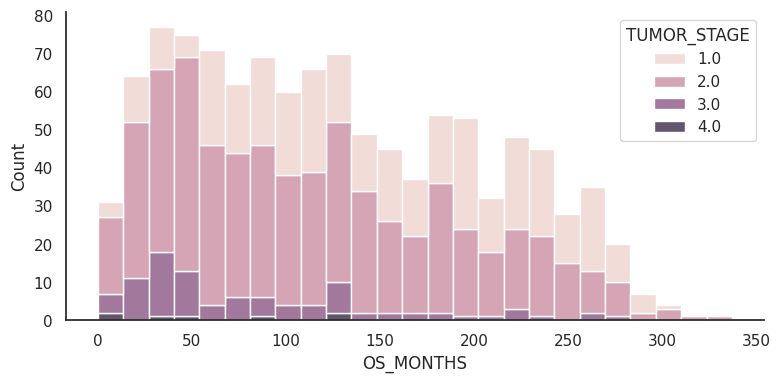

In [19]:
### Figure
sns.histplot(data, x="OS_MONTHS", bins=25, hue="TUMOR_STAGE",multiple="stack")
sns.despine()

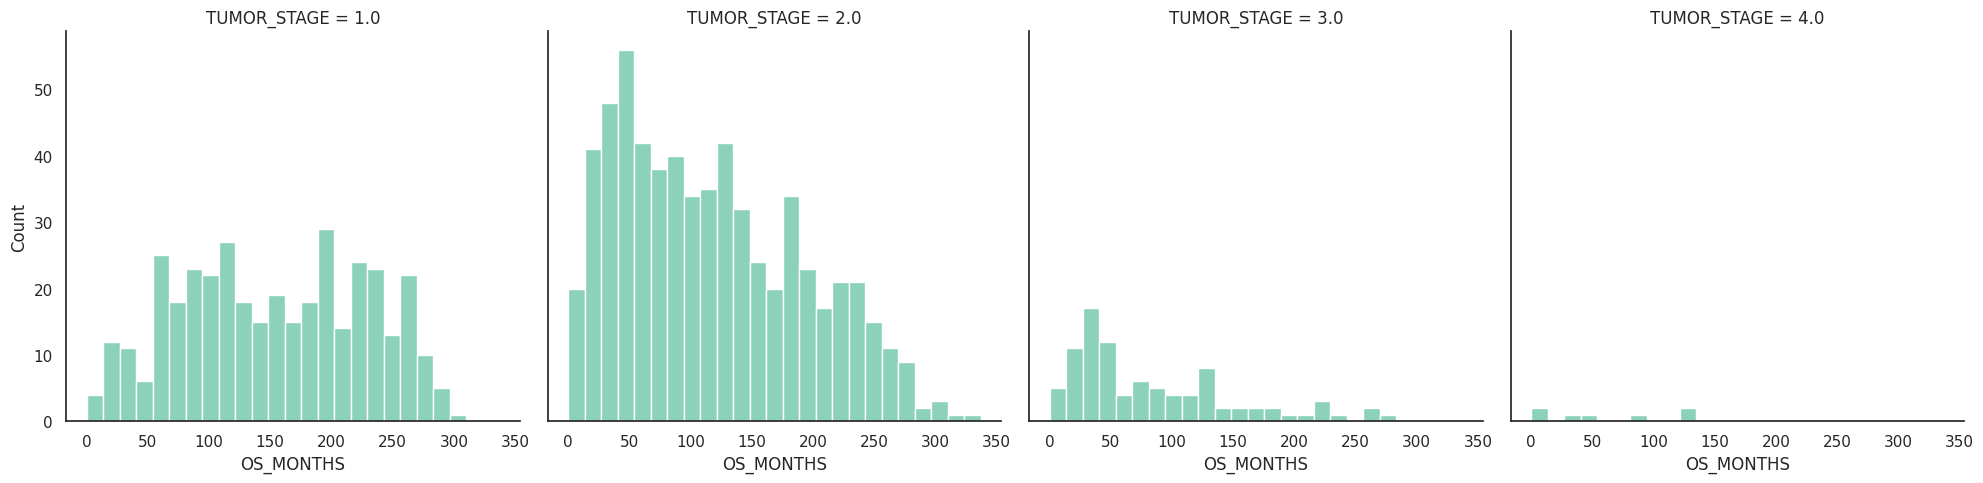

In [20]:
### Figure
p = sns.displot(data, x="OS_MONTHS", kind="hist", col="TUMOR_STAGE", multiple="stack", bins = 25)
sns.despine()

In [23]:
### Interpretation
print("Plus la tumeur est à un stade élevée, plus la survie globale diminue. En effet, pour les patients atteints d'une tumeur de stade 1 ou 2, la survie peut s'étendre jusqu'à environ 300 mois, tandis ce que pour les pateints atteints d'une tumeur de stade 3 survivent rarement au dela de 200 mois et pour une tumeur de stade 4, la survie globale est très faible.") 

Plus la tumeur est à un stade élevée, plus la survie globale diminue. En effet, pour les patients atteints d'une tumeur de stade 1 ou 2, la survie peut s'étendre jusqu'à environ 300 mois, tandis ce que pour les pateints atteints d'une tumeur de stade 3 survivent rarement au dela de 200 mois et pour une tumeur de stade 4, la survie globale est très faible.


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [25]:
### Hypothesis
print("plus la taille de la tumeur est élevée, plus le taux de survie est faible")

plus la taille de la tumeur est élevée, plus le taux de survie est faible


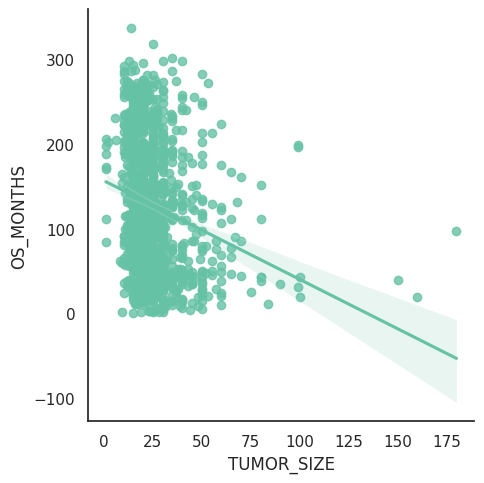

In [30]:
### Figure
sns.lmplot(data=data, x="TUMOR_SIZE", y="OS_MONTHS")
sns.despine()

In [32]:
### Interpretation
print("Il semble y avoir une corrélation inverse entre la taille de la tumeur et la survie globale. En effet, a mesure que la taille de la tumeur augmente, le taux de survie diminue.")

Il semble y avoir une corrélation inverse entre la taille de la tumeur et la survie globale. En effet, a mesure que la taille de la tumeur augmente, le taux de survie diminue.
